# Setup Environment

In [1]:
# Load libraries 
import os

In [2]:
# Change directory into our dataset directory
os.chdir("../datasets/boston house prediction")

In [3]:
# Check current file in directory
os.listdir()

['Ames Housing Data.docx', 'data_description.txt', 'test.csv', 'train.csv']

# Data Understanding

In [8]:
# Load libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
# Setup pandas interface
pd.set_option("display.max_columns", None)

In [6]:
# Read dataset description
with open("data_description.txt", "r") as f:
    data = f.read()
    f.close()
    
print(data)

# NOTE: Complete explanation of each feature in dataset is available in "Ames Housing Data.docx" file.

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [12]:
# Read train.csv as our baseline analysis
data = pd.read_csv("train.csv")

In [14]:
# Overview information of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [15]:
# Overview statistics aspect of dataset
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


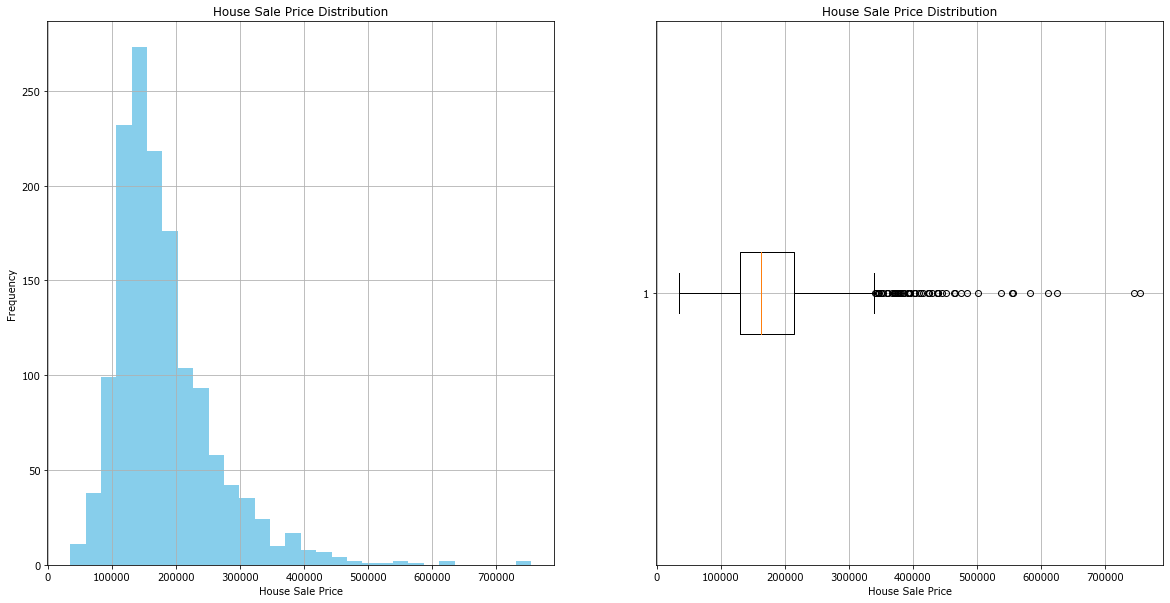

In [21]:
# Overview target distribution - "SalePrice"

sale_price = data['SalePrice']

fig, ax = plt.subplots(1, 2, figsize = (20, 10))

ax[0].hist(sale_price, bins = 30, color = "skyblue")
ax[0].grid()
ax[0].set_ylabel("Frequency")
ax[0].set_xlabel("House Sale Price")
ax[0].set_title("House Sale Price Distribution")

ax[1].boxplot(sale_price, vert = False)
ax[1].grid()
ax[1].set_xlabel("House Sale Price")
ax[1].set_title("House Sale Price Distribution");

In [112]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Exploratory Data Analysis

In [24]:
# Load libraries

In [42]:
# Check which column contain null on dataset.
df_isnull = data.isnull().sum()
df_isnull_filter = dict(df_isnull[df_isnull != 0])

col, val, typ = [], [], []
for key in df_isnull_filter:
    value = df_isnull_filter[key]
    col.append(key)
    val.append(value)
    typ.append(str(data[key].dtypes))
    
df_isnull_pivot = pd.DataFrame({"Column Name" : col, "Total Rows Contain NaN" : val, "Type of Column" : typ})
df_isnull_pivot

,Column Name,Total Rows Contain NaN,Type of Column
0,LotFrontage,259,float64
1,Alley,1369,object
2,MasVnrType,8,object
3,MasVnrArea,8,float64
4,BsmtQual,37,object
5,BsmtCond,37,object
6,BsmtExposure,38,object
7,BsmtFinType1,37,object
8,BsmtFinType2,38,object
9,Electrical,1,object


In [107]:
# Outlier analysis on numerical dataset
data_nums = data[data.select_dtypes(include=np.number).columns]

def vis_outlier_interval(interval: int, is_more: bool = False):
    fig, ax = plt.subplots(figsize = (20, 10))
    if is_more:
        condition = "More Than"
        data_nums_lower = data_nums[list(data_nums.describe().iloc[1][data_nums.describe().iloc[1] > interval].keys())]
    else:
        condition = "Less Than"
        data_nums_lower = data_nums[list(data_nums.describe().iloc[1][data_nums.describe().iloc[1] < interval].keys())]
    ax.boxplot(data_nums_lower)
    ax.grid()
    ax.set_title(f"Outlier Distribution based on Mean Interval Distribution {condition} (~{interval})", fontsize = 25)
    ax.set_xticklabels(data_nums_lower.columns, rotation = 90)
    plt.show()

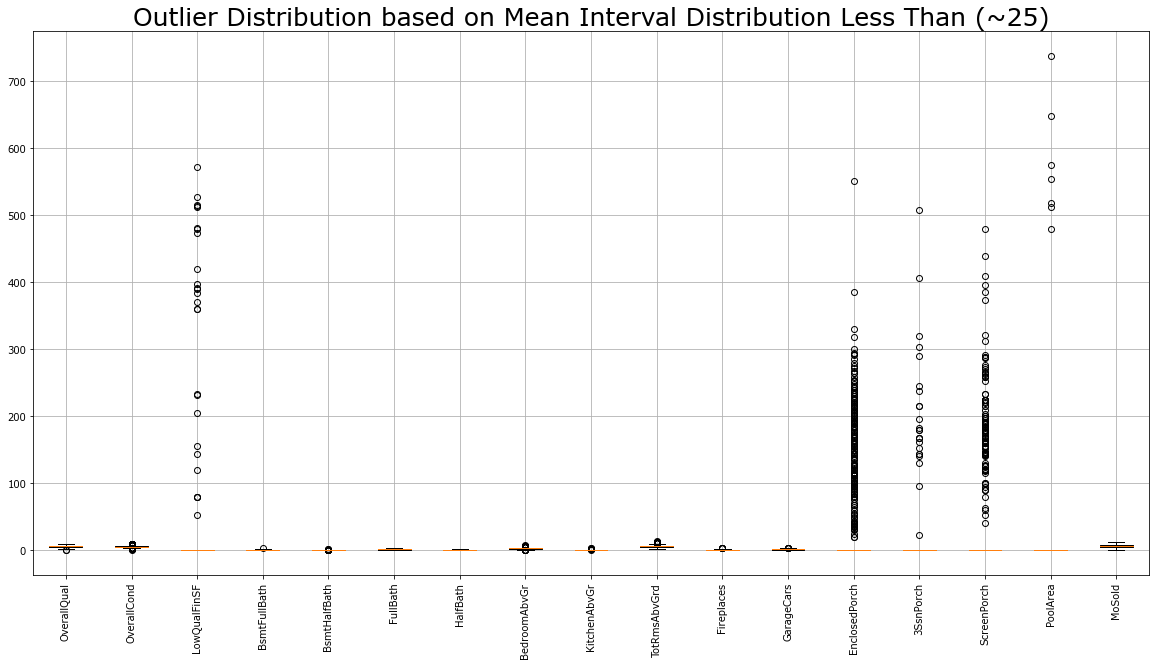

In [108]:
vis_outlier_interval(25)

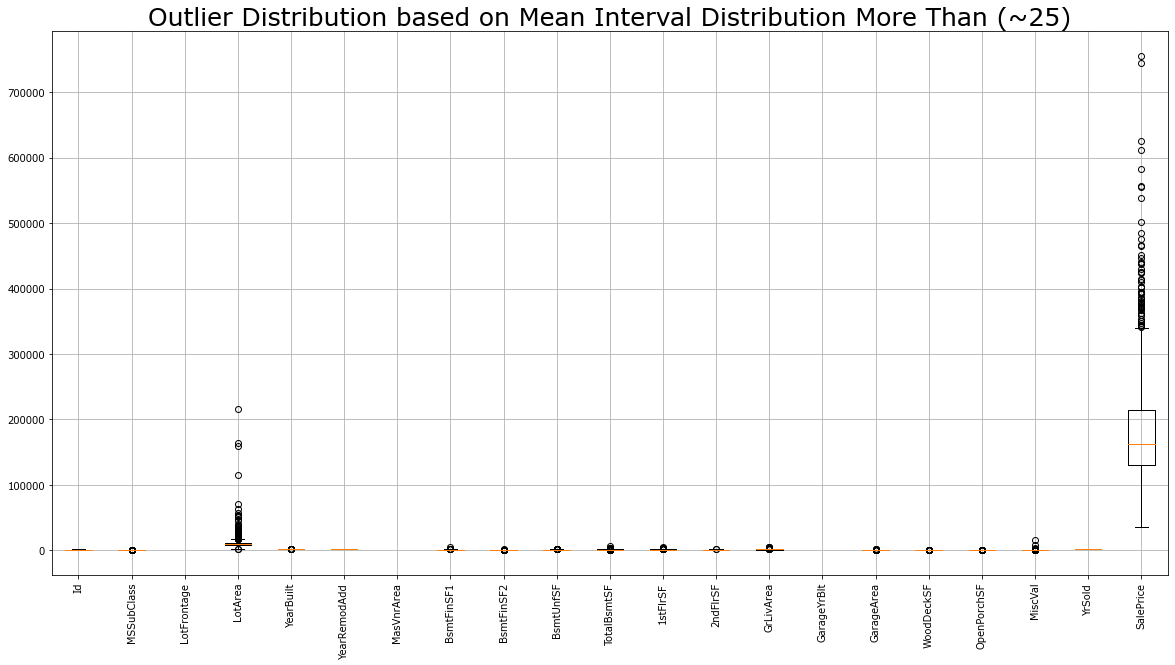

In [109]:
vis_outlier_interval(25, is_more = True)

In [136]:
# Outlier analysis on categorical dataset
selected_column_cats = [
    "HouseStyle", "RoofStyle", "RoofMatl", 
    "Exterior1st", "Exterior2nd", "Foundation", 
    "Electrical", "KitchenQual", "FireplaceQu", "GarageQual"
]
data_cats = data[selected_column_cats]

def vis_dist_cats(count: int, index: int, title: str):
    fig, ax = plt.subplots(1, count, figsize = (20, 5))
    for i in range(count):
        data_cats[data_cats.columns[index + i]].value_counts().plot(kind = "barh", ax = ax[i], color = "skyblue")
        ax[i].grid()
    fig.suptitle(title, fontsize = 25)
    plt.show()

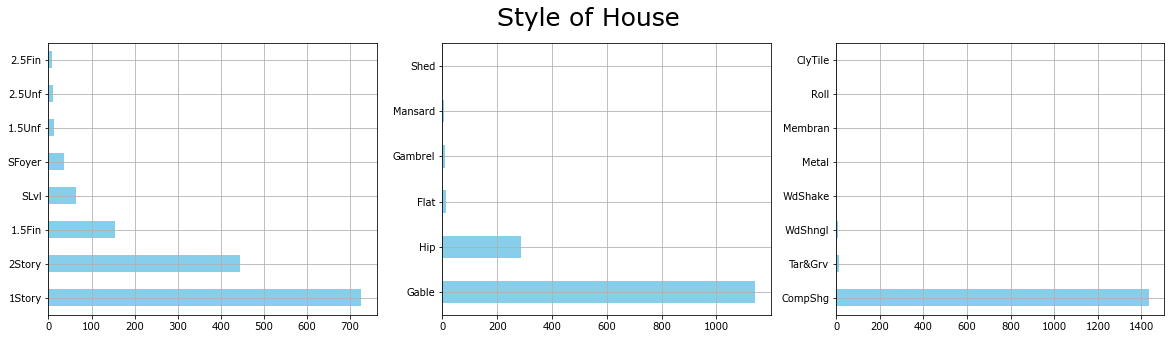

In [137]:
vis_dist_cats(3, 0, "Style of House")

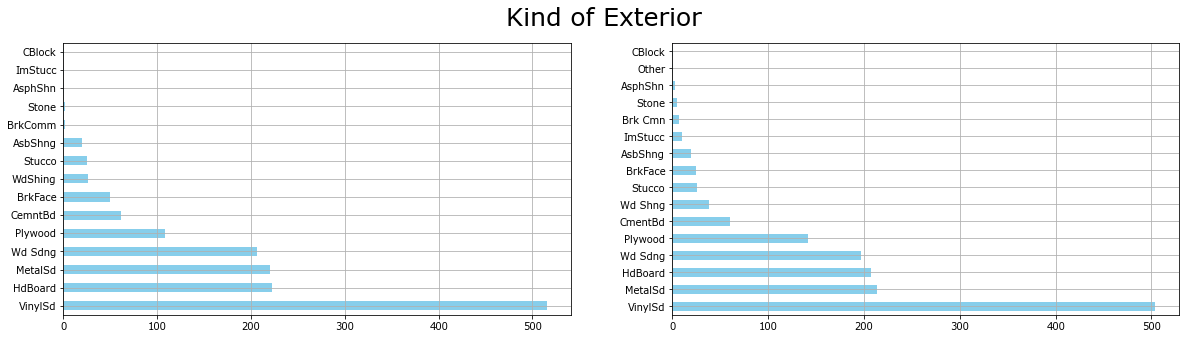

In [138]:
vis_dist_cats(2, 3, "Kind of Exterior")

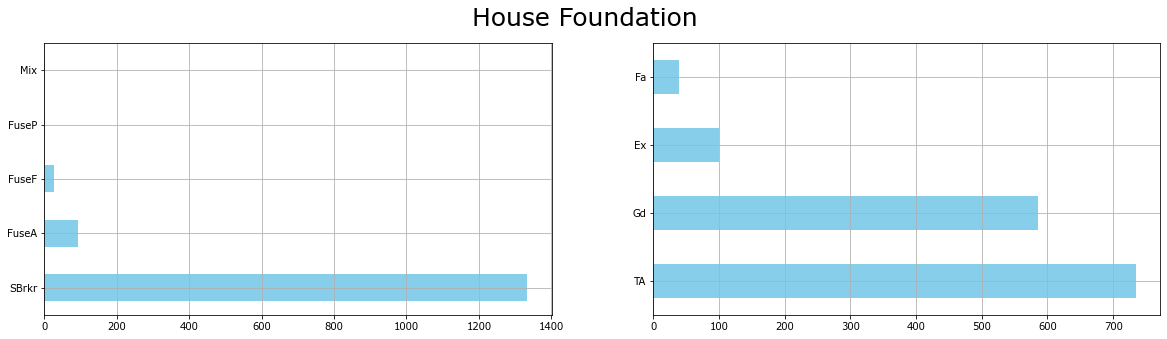

In [139]:
vis_dist_cats(2, 6, "House Foundation")

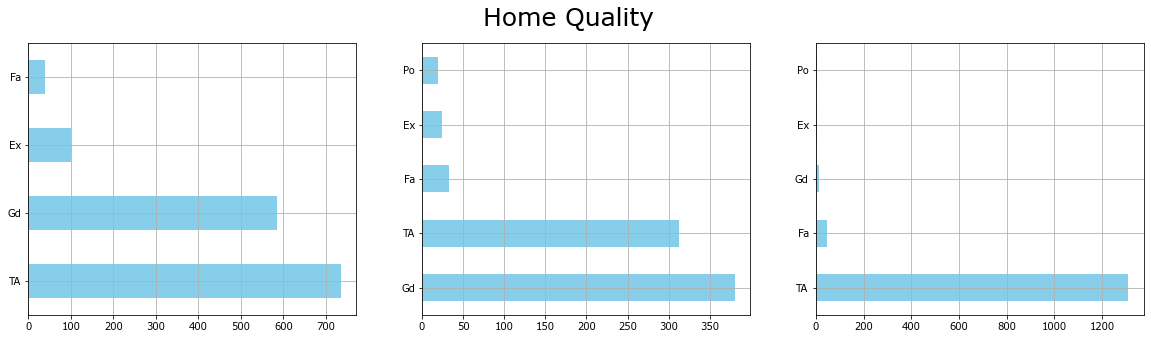

In [143]:
vis_dist_cats(3, 7, "Home Quality")

# Data Preprocessing

In [183]:
# Load libraries 
import json
from sklearn.preprocessing import LabelEncoder

### Feature Removal

In [222]:
# Define removed columns based on unnecessary feature or too many NaN on feature
removed_columns = ["Id", "Alley", "PoolQC", "Fence", "MiscFeature"]
data_preprocess = data[[col for col in data.columns if col not in removed_columns]]

# Check dimension
data_preprocess.shape

(1460, 76)

### Feature Transformation

In [223]:
# NOTE: This step should be syncronize for inference phase
mapping_encoder = {}
for col in data_preprocess.select_dtypes("O").columns:
    encoder = LabelEncoder()
    encoder.fit(data_preprocess[col])
    data_preprocess[f"{col}_numerical"] = encoder.transform(data_preprocess[col])
    mapping_encoder[col] = {k:v for (k,v) in zip(data_preprocess[col].value_counts().keys(), data_preprocess[f"{col}_numerical"].value_counts().keys())}

C:\Users\alif\AppData\Local\Temp\ipykernel_22908\1573668411.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_preprocess[f"{col}_numerical"] = encoder.transform(data_preprocess[col])
C:\Users\alif\AppData\Local\Temp\ipykernel_22908\1573668411.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_preprocess[f"{col}_numerical"] = encoder.transform(data_preprocess[col])
C:\Users\alif\AppData\Local\Temp\ipykernel_22908\1573668411.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

In [224]:
# remove categorical string Series from dataset
data_preprocess = data_preprocess.drop(list(data_preprocess.select_dtypes("O").columns), axis = 1)

In [225]:
# Overview mapping encoder result.
temp_json = json.dumps(mapping_encoder, indent=4)
print(temp_json)

{
    "MSZoning": {
        "RL": 3,
        "RM": 4,
        "FV": 1,
        "RH": 2,
        "C (all)": 0
    },
    "Street": {
        "Pave": 1,
        "Grvl": 0
    },
    "LotShape": {
        "Reg": 3,
        "IR1": 0,
        "IR2": 1,
        "IR3": 2
    },
    "LandContour": {
        "Lvl": 3,
        "Bnk": 0,
        "HLS": 1,
        "Low": 2
    },
    "Utilities": {
        "AllPub": 0,
        "NoSeWa": 1
    },
    "LotConfig": {
        "Inside": 4,
        "Corner": 0,
        "CulDSac": 1,
        "FR2": 2,
        "FR3": 3
    },
    "LandSlope": {
        "Gtl": 0,
        "Mod": 1,
        "Sev": 2
    },
    "Neighborhood": {
        "NAmes": 12,
        "CollgCr": 5,
        "OldTown": 17,
        "Edwards": 7,
        "Somerst": 21,
        "Gilbert": 8,
        "NridgHt": 16,
        "Sawyer": 19,
        "NWAmes": 14,
        "SawyerW": 20,
        "BrkSide": 3,
        "Crawfor": 6,
        "Mitchel": 11,
        "NoRidge": 15,
        "Timber": 23,
 

## Outlier Removal

In [226]:
# NOTE: This step should be syncronize for inference phase
def is_outlier(points, thresh=3.5):
    """
    Returns a boolean array with True if points are outliers and False 
    otherwise.

    Parameters:
    -----------
        points : An numobservations by numdimensions array of observations
        thresh : The modified z-score to use as a threshold. Observations with
            a modified z-score (based on the median absolute deviation) greater
            than this value will be classified as outliers.

    Returns:
    --------
        mask : A numobservations-length boolean array.

    References:
    ----------
        Boris Iglewicz and David Hoaglin (1993), "Volume 16: How to Detect and
        Handle Outliers", The ASQC Basic References in Quality Control:
        Statistical Techniques, Edward F. Mykytka, Ph.D., Editor. 
    """
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh

In [227]:
# TODO: Implement on Dataset.

### Missing Value Handling

In [228]:
data_preprocess

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_numerical,Street_numerical,LotShape_numerical,LandContour_numerical,Utilities_numerical,LotConfig_numerical,LandSlope_numerical,Neighborhood_numerical,Condition1_numerical,Condition2_numerical,BldgType_numerical,HouseStyle_numerical,RoofStyle_numerical,RoofMatl_numerical,Exterior1st_numerical,Exterior2nd_numerical,MasVnrType_numerical,ExterQual_numerical,ExterCond_numerical,Foundation_numerical,BsmtQual_numerical,BsmtCond_numerical,BsmtExposure_numerical,BsmtFinType1_numerical,BsmtFinType2_numerical,Heating_numerical,HeatingQC_numerical,CentralAir_numerical,Electrical_numerical,KitchenQual_numerical,Functional_numerical,FireplaceQu_numerical,GarageType_numerical,GarageFinish_numerical,GarageQual_numerical,GarageCond_numerical,PavedDrive_numerical,SaleType_numerical,SaleCondition_numerical
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,3,1,3,3,0,4,0,5,2,2,0,5,1,1,12,13,1,2,4,2,2,3,3,2,5,1,0,1,4,2,6,5,1,1,4,4,2,8,4
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500,3,1,3,3,0,2,0,24,1,2,0,2,1,1,8,8,2,3,4,1,2,3,1,0,5,1,0,1,4,3,6,4,1,1,4,4,2,8,4
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500,3,1,0,3,0,4,0,5,2,2,0,5,1,1,12,13,1,2,4,2,2,3,2,2,5,1,0,1,4,2,6,4,1,1,4,4,2,8,4
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000,3,1,0,3,0,0,0,6,2,2,0,5,1,1,13,15,2,3,4,0,3,1,3,0,5,1,2,1,4,2,6,2,5,2,4,4,2,8,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000,3,1,0,3,0,2,0,15,2,2,0,5,1,1,12,13,1,2,4,2,2,3,0,2,5,1,0,1,4,2,6,4,1,1,4,4,2,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0,0,8,2007,175000,3,1,3,3,0,4,0,8,2,2,0,5,1,1,12,13,2,3,4,2,2,3,3,5,5,1,0,1,4,3,6,4,1,1,4,4,2,8,4
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,0,0,2,2010,210000,3,1,3,3,0,4,0,14,2,2,0,2,1,1,9,10,3,3,4,1,2,3,3,0,4,1,4,1,4,3,2,4,1,2,4,4,2,8,4
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.0,1,252,0,60,0,0,0,0,2500,5,2010,266500,3,1,3,3,0,4,0,6,2,2,0,5,1,1,5,5,2,0,2,4,3,1,3,2,5,1,0,1,4,2,6,2,1,1,4,4,2,8,4
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1950.0,1,240,366,0,112,0,0,0,0,4,2010,142125,3,1,3,3,0,4,0,12,2,2,0,2,3,1,8,8,2,3,4,1,3,3,2,2,4,1,2,1,0,2,6,5,1,2,4,4,2,8,4


In [232]:
# duplicate preprocessed dataset - median method
data_preprocess_median = data_preprocess.copy()
for col in data_preprocess.drop("SalePrice", axis = 1).columns:
    data_preprocess_median[col] = data_preprocess_median[col].fillna(data_preprocess_median[col].median())

In [237]:
# Check dimension
data_preprocess_median.shape

(1460, 76)

In [233]:
# duplicate preprocessed dataset - average method
data_preprocess_mean = data_preprocess.copy()
for col in data_preprocess.drop("SalePrice", axis = 1).columns:
    data_preprocess_mean[col] = data_preprocess_mean[col].fillna(data_preprocess_mean[col].mean())

In [238]:
# Check dimension
data_preprocess_mean.shape

(1460, 76)

In [247]:
# duplicate preprocessed dataset - remove method
data_preprocess_remove = data_preprocess
data_preprocess_remove = data_preprocess_remove.dropna().reset_index().drop('index', axis = 1)

In [248]:
data_preprocess.isna().sum()

MSSubClass                   0
LotFrontage                259
LotArea                      0
OverallQual                  0
OverallCond                  0
                          ... 
GarageQual_numerical         0
GarageCond_numerical         0
PavedDrive_numerical         0
SaleType_numerical           0
SaleCondition_numerical      0
Length: 76, dtype: int64

In [249]:
# Check dimension
data_preprocess_remove.shape

(1201, 76)

# Data Modeling & Evaluation

In [298]:
# Load libraries 
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [279]:
# Function to create model & evaluation based on default params
def default_training_evaluation(
    data: pd.DataFrame,
    type_data: str, 
    estimator: object, 
    test_ratio: float = 0.2,
    target_col: str = "SalePrice"
    ):
    feature = data.drop(target_col, axis = 1)
    target  = data[target_col]
    
    X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=test_ratio, random_state=1)
    
    model   = estimator.fit(X_train, y_train)
    
    list_mse, list_r2, list_mae, list_rmse, list_rows = [], [], [], [], []
    for data_test, label_test in zip([X_train, X_test], [y_train, y_test]):
        preds = model.predict(data_test)
        _mse  = mean_squared_error(label_test, preds)
        list_mse.append(_mse)
        list_r2.append(r2_score(label_test, preds))
        list_mae.append(mean_absolute_error(label_test, preds))
        list_rmse.append(np.sqrt(_mse))
        list_rows.append(data_test.shape[0])
    
    metrics = pd.DataFrame({
        "ML Algorithm" : [str(model).replace("()","")] * 2, 
        "Type of Data" : ["Train", "Validation"],
        "Imputation Type" : [type_data] * 2, 
        "Total Rows"   : list_rows, 
        "Mean Squared Error"  : list_mse,
        "Mean Absolute Error" : list_mae,
        "R2 Score"                : list_r2,
        "Root Mean Squared Error" : list_rmse
    })
    
    return metrics

### Default Params

In [288]:
metrics1 = default_training_evaluation(
    data_preprocess_mean, 
    "Mean",
    LinearRegression()
)

In [289]:
metrics2 = default_training_evaluation(
    data_preprocess_median, 
    "Median",
    LinearRegression()
)

In [290]:
metrics3 = default_training_evaluation(
    data_preprocess_remove, 
    "Remove",
    LinearRegression()
)

In [291]:
metrics4 = default_training_evaluation(
    data_preprocess_mean, 
    "Mean",
    RandomForestRegressor()
)

In [292]:
metrics5 = default_training_evaluation(
    data_preprocess_median, 
    "Median",
    RandomForestRegressor()
)

In [293]:
metrics6 = default_training_evaluation(
    data_preprocess_remove, 
    "Remove",
    RandomForestRegressor()
)

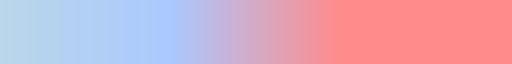

In [299]:
# define custom color map
custom_cm = sns.color_palette("blend:#BAD7E9,#ABC9FF,#FF8B8B,#FF8B8B", as_cmap=True)
custom_cm

In [313]:
# Combine metrics.
metrics_baseline = pd.concat(
    [metrics1, metrics2, metrics3, metrics4, metrics5, metrics6]
    , axis = 0).reset_index().drop('index', axis = 1)

metrics_baseline.style.background_gradient(
    subset=['Root Mean Squared Error'],
    cmap=custom_cm).background_gradient(
    subset=['R2 Score'], cmap=custom_cm)

,ML Algorithm,Type of Data,Imputation Type,Total Rows,Mean Squared Error,Mean Absolute Error,R2 Score,Root Mean Squared Error
0,LinearRegression,Train,Mean,1168,918533447.480409,18914.556726,0.849228,30307.316732
1,LinearRegression,Validation,Mean,292,1310431642.961716,19948.791056,0.816259,36199.884571
2,LinearRegression,Train,Median,1168,918771410.745056,18906.688862,0.849189,30311.242316
3,LinearRegression,Validation,Median,292,1310128038.174438,19940.621764,0.816301,36195.690879
4,LinearRegression,Train,Remove,960,837630873.766741,18165.859277,0.875855,28941.853323
5,LinearRegression,Validation,Remove,241,785950401.995343,20300.561146,0.865280,28034.806973
6,RandomForestRegressor,Train,Mean,1168,145907692.223739,6617.308450,0.976050,12079.225647
7,RandomForestRegressor,Validation,Mean,292,824326082.556493,16711.402089,0.884418,28711.079439
8,RandomForestRegressor,Train,Median,1168,150299634.603599,6689.318878,0.975329,12259.675143
9,RandomForestRegressor,Validation,Median,292,769577486.673738,16645.883562,0.892094,27741.259645


### Tuning Params

In [ ]:
# TODO: Implement.